# Simulation Monty Hall

### Diagramme de classes de l'application

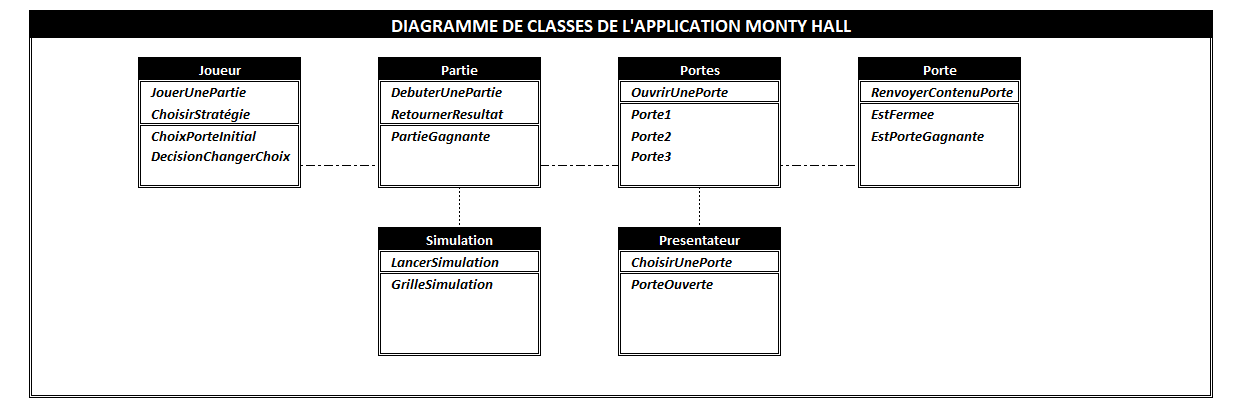

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "DiagrammeClasse.png")

### Classe Joueur

In [1]:
from numpy import random as rand

class joueur:

    ChoixPorteInitial = 0
    DecisionChangerChoix = False

    def __init__(self, strategie):
        self.ChoisirStrategie(strategie)
        self.ChoisirPorteInitiale()

    def ChoisirStrategie(self,strategie):
        self.DecisionChangerChoix = strategie

    def ChoisirPorteInitiale(self):
        self.ChoixPorteInitial = rand.randint(3)
    
    def RenvoyerPorteChoisie(self):
        return self.ChoixPorteInitial

    def RenvoyerDecisionChangerChoix(self):
        return self.DecisionChangerChoix



### Classe Presentateur

In [2]:
from numpy import random as rand

class presentateur:

    def __init__(self):
        self.ChoisirUnePorteAuHasard()

    def ChoisirUnePorteAuHasard(self):
        self.ChoixPortePresentateur = rand.randint(2)
    
    def RenvoyerPorteChoisie(self):
        return self.ChoixPortePresentateur


### Classe Porte

In [3]:
class porte:

    EstPorteGagnante = False
    EstPorteFerme = True

    def __init__(self,estGagnante):
        self.EstPorteGagnante = estGagnante
        self.EstPorteFerme = True
    
    def OuvrirPorte(self):
        self.EstPorteFerme = False

    def RenvoyerSiEstPorteFerme(self):
        return self.EstPorteFerme

    def RenvoyerSiEstPorteGagnante(self):
        return self.EstPorteGagnante

### Classe Portes

In [4]:
from MontyHall_Porte import porte
import numpy as np
from numpy import random as rand

class portes:

    def __init__(self,numeroPorteGagnante):  

        if (numeroPorteGagnante) == 0:
                self.Porte1 = porte(True)
        else : self.Porte1 = porte(False)

        if (numeroPorteGagnante) == 1:
                self.Porte2 = porte(True)
        else : self.Porte2 = porte(False)

        if (numeroPorteGagnante) == 2:
                self.Porte3 = porte(True)
        else : self.Porte3 = porte(False)

        self.Les3Portes = np.array([[0,0,0],[0,0,0]])

    def ConversionBooleanInteger(self,bool):
        if bool :
            return 1
        else :
            return 0

    def ConversionDes3PortesEnTableau(self):
        self.Les3Portes[0,0] = self.ConversionBooleanInteger(self.Porte1.RenvoyerSiEstPorteGagnante())
        self.Les3Portes[0,1] = self.ConversionBooleanInteger(self.Porte2.RenvoyerSiEstPorteGagnante())
        self.Les3Portes[0,2] = self.ConversionBooleanInteger(self.Porte3.RenvoyerSiEstPorteGagnante())

        self.Les3Portes[1,0] = self.ConversionBooleanInteger(self.Porte1.RenvoyerSiEstPorteFerme())
        self.Les3Portes[1,1] = self.ConversionBooleanInteger(self.Porte2.RenvoyerSiEstPorteFerme())
        self.Les3Portes[1,2] = self.ConversionBooleanInteger(self.Porte3.RenvoyerSiEstPorteFerme())

    def ChoisirUnePortePerdanteFermee(self,numeroPorteJ,numeroPorteP):
        numeroPorteJoueur = numeroPorteJ + 1
        numeroPortePresentateur = numeroPorteP + 1

        if (numeroPorteJoueur==1):
            if(numeroPortePresentateur==1):
                if(self.Porte2.RenvoyerSiEstPorteGagnante()):
                    self.Porte3.OuvrirPorte()
                else: self.Porte2.OuvrirPorte()
            if(numeroPortePresentateur==2):
                if(self.Porte3.RenvoyerSiEstPorteGagnante()):
                    self.Porte2.OuvrirPorte()
                else: self.Porte3.OuvrirPorte()

        if (numeroPorteJoueur==2):
            if(numeroPortePresentateur==1):
                if(self.Porte1.RenvoyerSiEstPorteGagnante()):
                    self.Porte3.OuvrirPorte()
                else: self.Porte1.OuvrirPorte()
            if(numeroPortePresentateur==2):
                if(self.Porte3.RenvoyerSiEstPorteGagnante()):
                    self.Porte1.OuvrirPorte()
                else: self.Porte3.OuvrirPorte()

        if (numeroPorteJoueur==3):
            if(numeroPortePresentateur==1):
                if(self.Porte1.RenvoyerSiEstPorteGagnante()):
                    self.Porte2.OuvrirPorte()
                else: self.Porte1.OuvrirPorte()
            if(numeroPortePresentateur==2):
                if(self.Porte2.RenvoyerSiEstPorteGagnante()):
                    self.Porte1.OuvrirPorte()
                else: self.Porte2.OuvrirPorte()
                
        self.ConversionDes3PortesEnTableau()

    def ChoisirUneNouvellePorte(self,numeroPorteJoueur):
        if(numeroPorteJoueur==0):
            self.Porte1.OuvrirPorte()
        if(numeroPorteJoueur==1):
            self.Porte2.OuvrirPorte()  
        if(numeroPorteJoueur==2):
            self.Porte3.OuvrirPorte()   

        self.ConversionDes3PortesEnTableau()
        #self.impression()

    def EstChoixPorteJoueurGagnant(self):
        if(np.array([np.sum(self.Les3Portes[:,0]),np.sum(self.Les3Portes[:,1]),np.sum(self.Les3Portes[:,2])]).max()==2):
            return True
        else : return False

    def impression(self):
        print(self.Les3Portes)


### Classe Partie

In [5]:
from MontyHall_Joueur import joueur
from MontyHall_Presentateur import presentateur
from MontyHall_Portes import portes
from numpy import random as rand

class partie:

    PartieGagnante = 0
    StrategieSuivie = False
    NumeroPorteGagnante = 0

    def __init__(self,joueur,presentateur):
        self.Joueur = joueur
        self.Presentateur = presentateur
        self.DefinitionPorteGagnante()

    def DefinitionPorteGagnante(self):
        self.NumeroPorteGagnante = rand.randint(3)

    def RenvoyerNumeroPorteGagnante(self):
        return self.NumeroPorteGagnante

    def DemarrerPartie(self):
        #print ("Le joueur a choisi la porte n° {}".format(self.Joueur.RenvoyerPorteChoisie()))
        part = portes(self.RenvoyerNumeroPorteGagnante())
        if(self.Joueur.RenvoyerDecisionChangerChoix()):
            part.ChoisirUnePortePerdanteFermee(self.Joueur.RenvoyerPorteChoisie(),self.Presentateur.RenvoyerPorteChoisie())
            part.ChoisirUneNouvellePorte(self.Joueur.RenvoyerPorteChoisie())
            self.PartieGagnante = int(part.EstChoixPorteJoueurGagnant())
        else:
            if(self.RenvoyerNumeroPorteGagnante()==self.Joueur.RenvoyerPorteChoisie()):
                self.PartieGagnante = 1
            else : self.PartieGagnante = 0

    def RenvoyerResultatPartie(self):
        #print("La partie a pour résultat: {}".format(self.PartieGagnante))
        return self.PartieGagnante


### Classe simulation

In [6]:
from MontyHall_Joueur import joueur
from MontyHall_Presentateur import presentateur
from MontyHall_Portes import portes
from MontyHall_Partie import partie

from numpy import random as rand
import matplotlib.pyplot as plt 
import numpy as np

class simulation:

    def __init__(self,NombreSimulation):
        self.nombreSimulations = NombreSimulation
        self.grilleSimulationSansChgtChoix = np.empty(NombreSimulation)
        self.grilleSimulationAvecChgtChoix = np.empty(NombreSimulation)
        self.grilleSimulation = np.empty(NombreSimulation)

    def simuler(self,nombreSimulation,TypeStrategie):
        part = partie(joueur(TypeStrategie),presentateur())
        part.DemarrerPartie()
        if(TypeStrategie):
            self.grilleSimulationAvecChgtChoix[nombreSimulation] = part.RenvoyerResultatPartie()
        else:
            self.grilleSimulationSansChgtChoix[nombreSimulation] = part.RenvoyerResultatPartie()

    def simulation(self,nombreSimulation,TypeStrategie):
        if nombreSimulation == 0:
            self.simuler(nombreSimulation-1,TypeStrategie)
        else:
            self.simuler(nombreSimulation-1,TypeStrategie)
            self.simulation(nombreSimulation-1,TypeStrategie)

    def demarrerSimulation(self):
        print("---------------------------------------------------------------------------")
        print("Simulation avec changement du choix initial :")
        self.simulation(self.nombreSimulations,True)
        print("Nombre de parties gagnées : {}".format(np.sum(self.grilleSimulationAvecChgtChoix[:])))
        print("Probabilté de gain : {}".format(np.sum(self.grilleSimulationAvecChgtChoix[:])/self.nombreSimulations))
        print("---------------------------------------------------------------------------")
        print("Simulation sans changement du choix initial :")
        self.simulation(self.nombreSimulations,False)
        print("Nombre de parties gagnées : {}".format(np.sum(self.grilleSimulationSansChgtChoix[:])))
        print("Probabilté de gain : {}".format(np.sum(self.grilleSimulationSansChgtChoix[:])/self.nombreSimulations))
        print("---------------------------------------------------------------------------")

        self.AfficherResultatsGraphiques()

    def AfficherResultatsGraphiques(self):
        histogramme = plt.bar(
                        [0,1],
                        [np.sum(self.grilleSimulationSansChgtChoix[:])/self.nombreSimulations,
                         np.sum(self.grilleSimulationAvecChgtChoix[:])/self.nombreSimulations],
                        tick_label=["Sans Changement","Avec Changement"])



## Programme principal

---------------------------------------------------------------------------
Simulation avec changement du choix initial :
Nombre de parties gagnées : 334.0
Probabilté de gain : 0.668
---------------------------------------------------------------------------
Simulation sans changement du choix initial :
Nombre de parties gagnées : 170.0
Probabilté de gain : 0.34
---------------------------------------------------------------------------


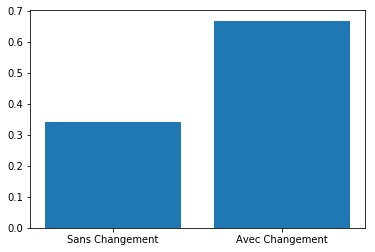

In [7]:
# Effectuer 500 simulations du Monty Hall :
sim = simulation(500)
sim.demarrerSimulation()

### On retrouve donc bien les 2/3 de probabilités pour un jeu avec changement du choix initial contre 1/3 pour l'autre option où le joueur conserve sa décision de départ...